# 数据预处理

加载load_iris数据到panda，选择sepal length、sepal width作为可视化特征，并选择类别setosa, versicolor，将问题化简为二分类问题

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
col_names = ['sepal length (cm)', 'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']
tag_names = ['setosa', 'versicolor', 'virginica']

data = load_iris()

In [3]:
df = pd.DataFrame(data['data'])
df.columns = col_names
df['target'] = None
for i in range(df.shape[0]):
    df.at[i, 'target'] = data['target'][i] if data['target'][i] != 0 else -1

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
temp = df[["sepal length (cm)", "sepal width (cm)", "target"]]
temp = temp[temp['target'] < 2]

In [6]:
temp

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


# 数据可视化

setosa显示为绿色，versicolor显示为红色

In [7]:
import matplotlib.pyplot as plt

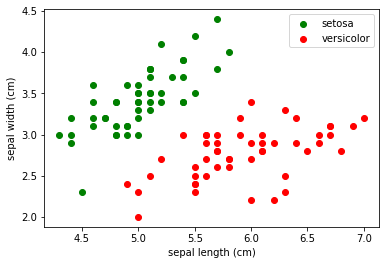

In [8]:
setosa = temp[temp['target']==-1]
versicolor = temp[temp['target']==1]

l1 = plt.scatter(setosa.loc[:,'sepal length (cm)'], setosa.loc[:, 'sepal width (cm)'], c='green')
l2 = plt.scatter(versicolor.loc[:,'sepal length (cm)'], versicolor.loc[:, 'sepal width (cm)'], c='red')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(handles = [l1, l2,], labels = ['setosa', 'versicolor'], loc = 'best')

plt.show()  

# Perceptron 算法实现

In [9]:
import numpy as np

In [10]:
def perceptron(X, y, max_itr=1000,alpha=0.01):
    w,b= np.zeros(X.shape[1]), 0
    for n in range(max_itr):
        num = 0
        for i in range(y.shape[0]):
            if y[i]*(np.dot(w, X[i]) + b) <= 0:
                w = w + alpha * y[i] * X[i]  
                b = b + alpha * y[i]
                num = num + 1
        if num == 0:
            print('iter n =',n)
            break;
    if max_itr == n:
        print('perceptron did not convergence! max_iter =',max_itr)
    return w, b

In [11]:
w,b = perceptron(X=temp[["sepal length (cm)", "sepal width (cm)"]].values, y=temp[["target"]].values)

iter n = 700


# 可视化划分

In [12]:
w,b

(array([0.7899999999999948, -1.0069999999999946], dtype=object),
 array([-1.2400000000000009], dtype=object))

通过perceptron学习得到的法向量$w=[w_0, w_1]$和截距$b$，则确定的超平面为$w*x+b=0$，即$w_0 *x_0 + w_1 * x_1 + b =0$,利用plot画图时转化为：
$x_1 = -\frac{w_0}{w_1}x_0 - \frac{b}{w_1}$

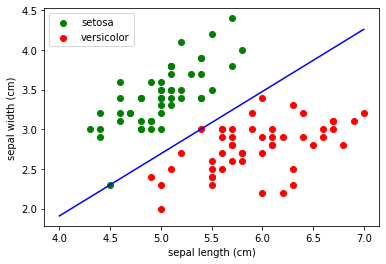

In [13]:
X = [4, 7]
y = [-(w[0]*x + b)/w[1] for x in X]

setosa = temp[temp['target']==-1]
versicolor = temp[temp['target']==1]

l1 = plt.scatter(setosa.loc[:,'sepal length (cm)'], setosa.loc[:, 'sepal width (cm)'], c='green')
l2 = plt.scatter(versicolor.loc[:,'sepal length (cm)'], versicolor.loc[:, 'sepal width (cm)'], c='red')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(handles = [l1, l2,], labels = ['setosa', 'versicolor'], loc = 'best')

plt.plot(X, y, color="blue")

plt.show()

# sklearn 对比

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
clf = Perceptron(random_state=0)
clf.fit(X=temp[["sepal length (cm)", "sepal width (cm)"]].values, 
        y=temp[["target"]].values.reshape(-1,).astype('int'))

Perceptron()

In [16]:
w = clf.coef_[0]
b = clf.intercept_[0]
w,b

(array([ 23.2, -38.7]), -5.0)

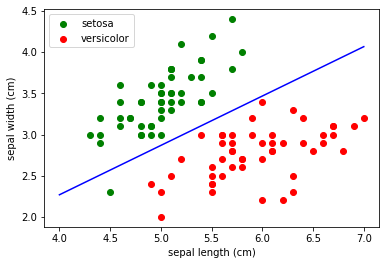

In [17]:
X = [4, 7]
y = [-(w[0]*x + b)/w[1] for x in X]

setosa = temp[temp['target']==-1]
versicolor = temp[temp['target']==1]

l1 = plt.scatter(setosa.loc[:,'sepal length (cm)'], setosa.loc[:, 'sepal width (cm)'], c='green')
l2 = plt.scatter(versicolor.loc[:,'sepal length (cm)'], versicolor.loc[:, 'sepal width (cm)'], c='red')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(handles = [l1, l2,], labels = ['setosa', 'versicolor'], loc = 'best')

plt.plot(X, y, color="blue")

plt.show()